# Support Vector Machines Project

## copyright by pierian Data Inc.

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**The overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features.**

---
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9.8   Legit  red  
3      9.8   Legit  red  
4      9.4   Legit  red

**What are the unique variables in the target column we are trying to predict (quality)?**

In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**Create a countplot that displays the count per category of Legit vs Fraud.**

<Axes: xlabel='quality', ylabel='count'>

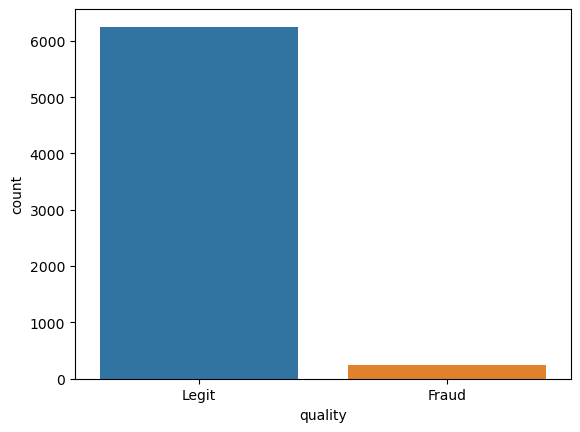

In [6]:
sns.countplot(df,x='quality')

**Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<Axes: xlabel='type', ylabel='count'>

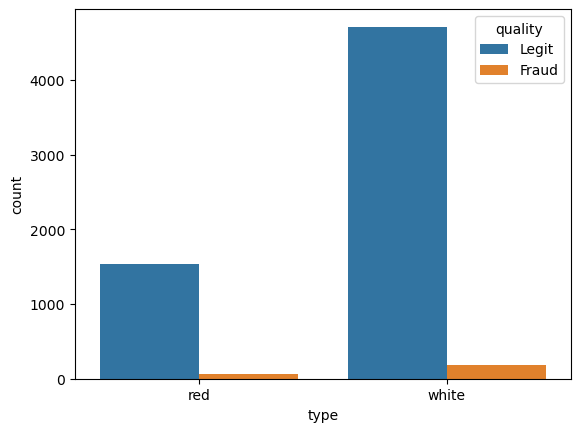

In [7]:
sns.countplot(df,x='type',hue='quality')

**What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [17]:
print('Percentage of fraud in Red Wines:')
print(len(df[(df['quality']=='Fraud') & (df['type']=='red')])/len(df[df['type']=='red'])*100)

Percentage of fraud in Red Wines:
3.9399624765478425


In [18]:
print('Percentage of fraud in White Wines:')
print(len(df[(df['quality']=='Fraud') & (df['type']=='white')])/len(df[df['type']=='white'])*100)

Percentage of fraud in White Wines:
3.7362188648427925


**As you can see from above the results I showed, the data we have to predict is unbalanced**

## Visualization the data

**Calculate the correlation between the various features and the "quality" column.**

In [20]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

In [26]:
df.corr()['Fraud']

/var/folders/y1/cjkldmj10tl4qk1jptpdr9bw0000gn/T/ipykernel_90349/1400609001.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fraud']


fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**Create a bar plot of the correlation values to Fraudlent wine.**

In [32]:
coef = df.corr()['Fraud'].drop(labels=['Fraud']).sort_values()

/var/folders/y1/cjkldmj10tl4qk1jptpdr9bw0000gn/T/ipykernel_90349/3083741542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coef = df.corr()['Fraud'].drop(labels=['Fraud']).sort_values()


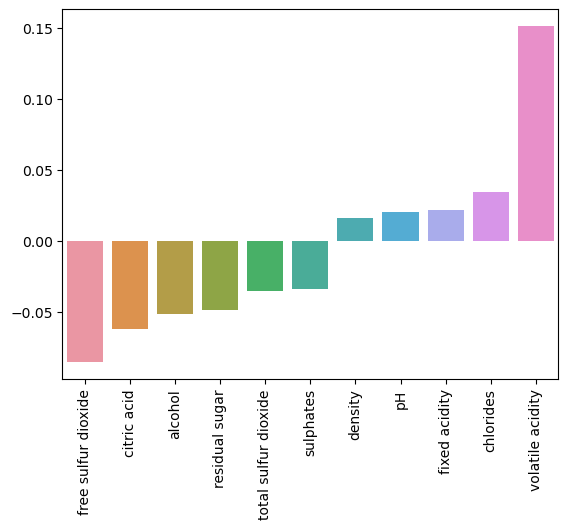

In [43]:
fig, ax = plt.subplots(1,1,dpi = 100)
ax = sns.barplot(x=coef.index, y=coef.values)
plt.xticks(rotation=90)
plt.show()

**Create a clustermap with seaborn to explore the relationships between variables.**

/var/folders/y1/cjkldmj10tl4qk1jptpdr9bw0000gn/T/ipykernel_90349/469504455.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=df.corr(),cmap='coolwarm')


<Figure size 750x750 with 0 Axes>

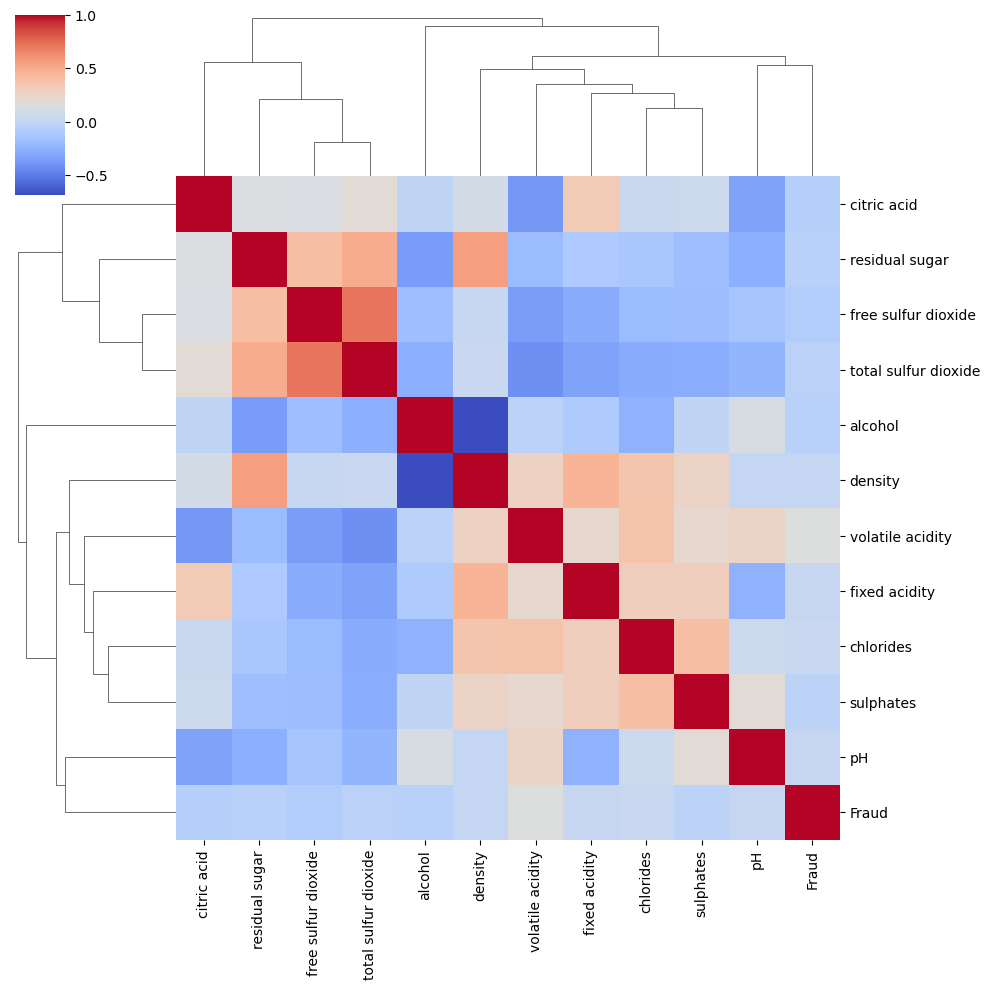

In [52]:
plt.figure(dpi=150,figsize=(5,5))
sns.clustermap(data=df.corr(),cmap='coolwarm')

----
## Machine Learning Model

**Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [54]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [56]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol quality  type  Fraud  
0         9.4   Legit     0      0  
1         9.8   Legit     0      0  
2         9.8   Legit     0      0  
3         9.8   Legit     0      0  
4         9.4   Legit     0      0  
...       ...     ...   ...    ...  
6492     11.2   Legit     1      0  
6493      9.6   Legit     1      0  
6494      9.4   Legit     1      0  
6495     12.8   Legit     1      0  
6496     11.8   Legit     1      0  

[6497 rows x 14 columns]

**Separating out the data,Performing a Train|Test split on the data and then Scaling the data**

In [57]:
X = df.drop(['quality'],axis=1)
y = df['quality']

In [59]:
from sklearn.model_selection import train_test_split 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
scaled_X_train = scaler.fit_transform(X_train)

In [64]:
scaled_X_test = scaler.transform(X_test)

**Create an instance of a Support Vector Machine classifier.\
There are some options to treat a dataset with a unbalanced feture column we predict such as oversumpling and undersumpling. I will go with adding class-weight paramater this time.**

In [65]:
from sklearn.svm import SVC

In [66]:
model = SVC(class_weight='balanced')

**Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [90]:
param_grid = {'C':[0.0,0.01,0.1,0.5,1.0],'gamma':['scale','auto']}

In [67]:
from sklearn.model_selection import GridSearchCV

In [93]:
model_grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [94]:
model_grid.fit(X_train,y_train)

/Users/kodaikunimitsu/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kodaikunimitsu/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kodaikunimitsu/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/Users/kodaikunimitsu/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_paramet

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.0, 0.01, 0.1, 0.5, 1.0],
                         'gamma': ['scale', 'auto']})

In [84]:
model_grid.best_estimator_

SVC(C=1, class_weight='balanced', gamma='auto')

## Evaluating the model
**Display the confusion matrix and classification report for my model.**

In [85]:
pred = model_grid.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
confusion_matrix(y_test,pred)

array([[ 10,  17],
       [  7, 616]])

In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       Fraud       0.59      0.37      0.45        27
       Legit       0.97      0.99      0.98       623

    accuracy                           0.96       650
   macro avg       0.78      0.68      0.72       650
weighted avg       0.96      0.96      0.96       650



**Finally, think about how well this model performed, realistically will this work?**

The f1-score for Fraud is pretty poor. There are some solutions to solve this problem. One of these is that I keep modifying the model I created to get a good F1-score. In another way, thinking about this Fraud judgeing task from a different perspective might be better to deal with this problem such as collecting some different features.

## Fin.